In [113]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [17]:
# X = np.random.rand(100, 2) * 5
# y = 5 * X[:, 0] + 3 * X[:, 1] + 8 + np.random.randn(100)

In [64]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [128]:
X = iris.data[:, 2:]
y = iris.target

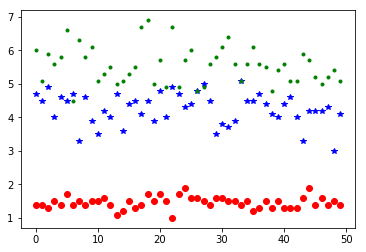

In [129]:
plt.plot(X[y==0][:, 0], 'ro')
plt.plot(X[y==1][:, 0], 'b*')
plt.plot(X[y==2][:, 0], 'g.')
plt.show()

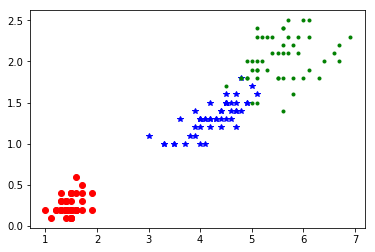

In [130]:
plt.plot(X[y==0][:, 0], X[y==0][:, 1], 'ro')
plt.plot(X[y==1][:, 0], X[y==1][:, 1], 'b*')
plt.plot(X[y==2][:, 0], X[y==2][:, 1], 'g.')
plt.show()

In [131]:
y_0 = (iris["target"] == 0)

In [132]:
m = len(X)
C = 5
alpha = 1/(m*C)

X_scaled = StandardScaler().fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        n_iter=100000, random_state=42)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


## First train the model

### with all classes

In [135]:
lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.0013333333333333333, average=False, class_weight=None,
       epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=100000,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Class 0 or not

In [136]:
lin_clf.fit(X_scaled, y_0)
svm_clf.fit(X_scaled, y_0)
sgd_clf.fit(X_scaled, y_0)

SGDClassifier(alpha=0.0013333333333333333, average=False, class_weight=None,
       epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', max_iter=100000,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## Now check parameter

In [137]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [-1.75096408] [[-1.29893015 -1.46915017]]
SVC:                          [-1.80443201] [[-1.49374877 -1.23340465]]
SGDClassifier(alpha=0.00133): [-1.805] [[-1.49558507 -1.23474182]]
